In [2]:
import requests
import os
import zipfile
import geopandas as gpd
import shutil

In [3]:
#Obtenemos el directorio de baches_hermosillo
directorio = os.path.dirname(os.getcwd())
directorio

'/home/jesolis14/Documentos/GitHub/proyecto-baches-hmo'

In [4]:
#Descargando el archivo zip de las agebs
url = 'https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/urbana/SHP_2/Sonora/702825317744_s.zip'
r = requests.get(url, allow_redirects=True)

if not os.path.exists(directorio + '/data/raw/agebs_hmo.zip'):
    if not os.path.exists(directorio + '/data/raw'):
        if not os.path.exists(directorio + '/data'):
            os.makedirs(directorio + '/data')
        os.makedirs(directorio + '/data/raw')
    open(directorio + '/data/raw/agebs_hmo.zip', 'wb').write(r.content)


In [5]:
# Descomprimir agebs_hmo.zip y eliminar archivos inecesarios
datos = '/data/raw/agebs_hmo'
archivo_ageb = '/data/raw/agebs_hmo.zip'
hmo_ageb = ['.html', 'a.dbf','a.prj','a.shp', 'a.shp.xml', 'a.dbf', 'a.shx']

if not os.path.exists(directorio + datos):
    with zipfile.ZipFile(directorio + archivo_ageb, 'r') as zip_ref:
        zip_ref.extractall(path= directorio + datos)

with zipfile.ZipFile(directorio + datos + '/260300001.zip') as zip_ref:
    for archivo in hmo_ageb:
        if not os.path.exists(directorio + datos + '260300001' + archivo):
            zip_ref.extract('260300001' + archivo, directorio + '/data/raw')


shutil.rmtree(directorio + datos)
os.remove(directorio +'/data/raw/agebs_hmo.zip')


<Axes: >

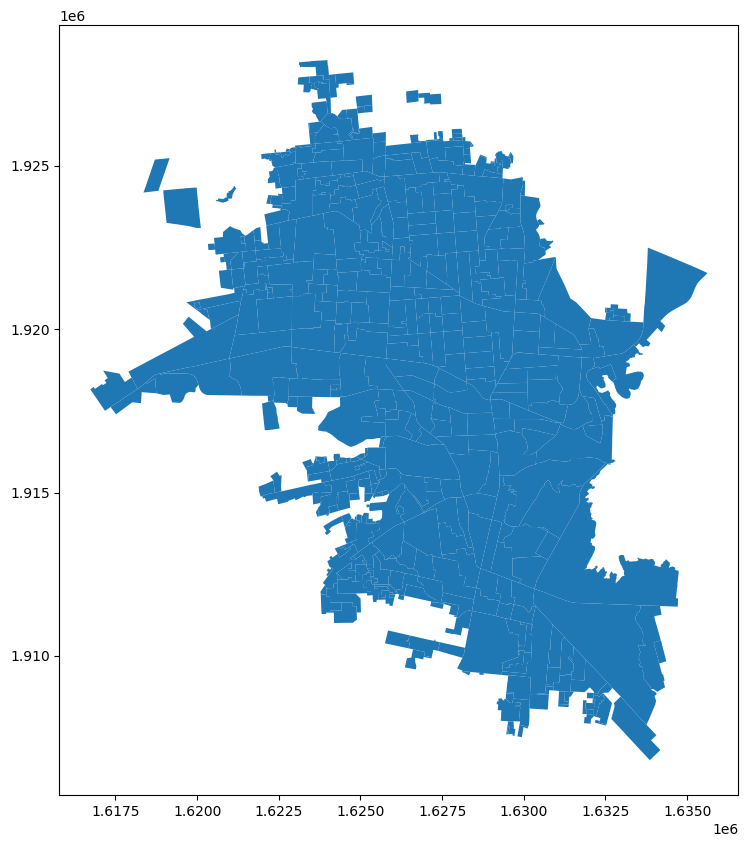

In [6]:
hermosillo_agebs = gpd.read_file(directorio + '/data/raw/260300001a.shp')
hermosillo_agebs.plot(figsize=(10,10))